In [3]:
import numpy as np 

import torch 
import torch.nn as nn
# from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

# Environments

In [125]:
num_data_each_env = 1500
E = np.array([0.4,0.6,0.8,1.1,1.5,1.8,2.3,2.8])
E = np.array([0.2, 2, 3, 5])
E

array([0.2, 2. , 3. , 5. ])

# ICARL Paper

In [126]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,output_dim)
    def forward(self, x):
        y = self.fc1(x)
        y = self.act1(y)
        y = self.fc2(y)
        return y

In [127]:
def get_x_function(mode="mlp"):
    if mode=="mlp":
        return MLP(2, 16, 10).to(torch.float64)
    elif mode=="identity":
        return lambda z: z

non_linearity_type = "neural_network"

# non_linearity = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [128]:
S1 = list()
S2 = list()
Y = list()
X = list()
U = list()

non_linearity = MLP(2, 12, 10).to(torch.float64)

for e in E:
    S1_env = np.random.normal(e, 1, num_data_each_env)
    S2_env = np.random.normal(2*e, 2, num_data_each_env)

    S1_env_t = torch.tensor(S1_env).unsqueeze(dim=1)
    S2_env_t = torch.tensor(S2_env).unsqueeze(dim=1)

    S1_S2_env_t = torch.cat([S1_env_t, S2_env_t], dim=1)
    
    Y_mu_env = S1_env + S2_env
    
    S1.append( S1_env )
    S2.append( S2_env )
    
    Y.append( 
        np.random.normal( S1_env+S2_env, 1, num_data_each_env)
    )
    
    X.append(
        non_linearity(
            S1_S2_env_t
        ).detach().numpy()
    )
    
    U.append(
        e * np.ones(num_data_each_env)
    )
    
#     X_env.append(
#             non_linearity(
#                 torch.
#             )
#     )
    
#     Y_env = list()
#     X_env = list()
#     for (z_1, z_2) in zip(Z1_env, Z2_env):
#         Y_env.append(np.random.normal(z_1+z_2, 1, 1)[0]) 
#         _input = torch.tensor([[z_1, z_2]])
#         X_env.append( non_linearity(_input)[0,:].detach().numpy() )
    
#     Z1.append(Z1_env)
#     Z2.append(Z2_env)
#     Y.append(Y_env)
#     X.append(X_env)
#     U.append([e]*num_data_each_env)

S1 = np.array(Z1)[:, :, np.newaxis]
S2 = np.array(Z2)[:, :, np.newaxis]
S = np.concatenate([S1, S2], axis=2).squeeze()
X = np.array(X)
Y = np.array(Y)[:, :, np.newaxis]
U = np.array(U)[:, :, np.newaxis]
U = np.concatenate([U, Y], axis=2)

In [135]:
!mkdir "icarl_data"

np.save(f"./icarl_data/x.npy", X)
np.save(f"./icarl_data/u.npy", U)
np.save(f"./icarl_data/s.npy", S)

!cp "./icarl_data/x.npy" "./run/datasets/x.npy"
!cp "./icarl_data/u.npy" "./run/datasets/u.npy"
!cp "./icarl_data/s.npy" "./run/datasets/s.npy"

mkdir: cannot create directory ‘icarl_data’: File exists


# Load the Data with ICARL Data Loader

In [1]:
import data

import importlib
importlib.reload(data)

<module 'data' from '/home/mlcmadmin/ahedayat/causal_ivae/data/__init__.py'>

In [3]:
dataset = data.ICARLDataset(
    root="./run/datasets", 
    data_postfix="",
)

print(f"X: {dataset.x.shape}")
print(f"U: {dataset.u.shape}")
print(f"S: {dataset.s.shape}")

X: (6000, 10)
U: (6000, 2)
S: (6000, 2)


In [4]:
x, u, s = dataset[1]

In [5]:
x.shape

torch.Size([10])

In [6]:
u.shape

torch.Size([2])

In [8]:
s.shape

torch.Size([2])

# Non-Linear Data

In [ ]:
num_data_each_env = 1500
E = np.array([0.4,0.6,0.8,1.1,1.5,1.8,2.3,2.8])
E = np.array([0.2, 2, 3, 5])
E

# Others

In [54]:
# scalerZ = MinMaxScaler()
# scaler = MinMaxScaler()

In [55]:
Z1 = list()
Z2 = list()
Z3 = list()
Z4 = list()
Z5 = list()
Y = list()
# Y2 = list()
X = list()
U = list()

non_linearity = MLP().to(torch.float64)

for e in E:
    Z1_env = np.random.normal(e, 1, num_data_each_env)
    Z2_env = np.random.normal(2*e, 2, num_data_each_env)
    
    L13_env = np.random.uniform(1.2*e , 1.8*e)
    L24_env = np.random.normal(1.5*e ,2.5*e)
    L35_env = np.random.uniform(1.6*e , 2.6*e)
    Ly5_env = np.random.uniform(1.2*e , 2.3*e)
    Z3_env = np.random.normal(1.75*e, 1, num_data_each_env) + L13_env * Z1_env**2 + Z1_env
    Z4_env = np.random.normal(1.2*e, 2, num_data_each_env) + L24_env * Z2_env**2 + Z2_env
#     Z5_env = np.random.normal(4*e, 2, num_data_each_env) + L24_env * Z2_env**2

    Z5_env = list()
    Y_env = list()
    X_env = list()
    for (z_1, z_2 , z_3 , z_4) in zip(Z1_env, Z2_env ,Z3_env, Z4_env):
        y_tmp = np.random.normal(z_4 + z_2 , 1, 1)[0]
        Y_env.append(y_tmp) 
        z5_tmp = Ly5_env*y_tmp + L35_env*(z_3) + np.random.normal(0.2*e, 2, 1)[0]
        _input = torch.tensor([[z_1, z_2,z_3 , z_4 , z5_tmp]])
        X_env.append( non_linearity(_input)[0,:].detach().numpy() )
        Z5_env.append(z5_tmp)
    
    Z1.append(Z1_env)
    Z2.append(Z2_env)
    Z3.append(Z1_env)
    Z4.append(Z2_env)
    Z5.append(Z5_env)
    Y.append(Y_env)
    X.append(X_env)
    U.append([e]*num_data_each_env)

Z1 = np.array(Z1)
Z2 = np.array(Z2)
Z3 = np.array(Z3)
Z4 = np.array(Z4)
Z5 = np.array(Z5)
Y = np.array(Y)
X = np.array(X)
U = np.array(U)

In [211]:
# Z1 = list()
# Z2 = list()
# Z3 = list()
# Z4 = list()
# Y = list()
# X = list()
# U = list()

# non_linearity = MLP().to(torch.float64)

# for e in E:
#     Z1_env = np.random.normal(e, 1, num_data_each_env)
#     Z2_env = np.random.normal(2*e, 2, num_data_each_env)
#     L13_env = np.random.uniform(3.7*e , 8*e)
#     L24_env = np.random.normal(2.5*e ,9*e)
#     Z3_env = np.random.normal(3*e, 1, num_data_each_env) + L13_env * (Z1_env ** 2)
#     Z4_env = np.random.normal(4*e, 2, num_data_each_env) + L24_env * (Z2_env ** 2)

    
#     Y_env = list()
#     X_env = list()
#     for (z_1, z_2 , z_3 , z_4) in zip(Z1_env, Z2_env ,Z3_env, Z4_env):
#         Y_env.append(np.random.normal(z_1+z_2 , 1, 1)[0]) 
#         _input = torch.tensor([[z_1, z_2,z_3 , z_4]])
#         X_env.append( non_linearity(_input)[0,:].detach().numpy() )
    
#     Z1.append(Z1_env)
#     Z2.append(Z2_env)
#     Z3.append(Z1_env)
#     Z4.append(Z2_env)
#     Y.append(Y_env)
#     X.append(X_env)
#     U.append([e]*num_data_each_env)

# Z1 = np.array(Z1)
# Z2 = np.array(Z2)
# Z3 = np.array(Z3)
# Z4 = np.array(Z4)
# Y = np.array(Y)
# X = np.array(X)
# U = np.array(U)

In [210]:
# X = np.concatenate([X[env, :, :] for env in range(X.shape[0])])
# Y = np.concatenate([Y[env, :] for env in range(Y.shape[0])])
# Y = Y[:, np.newaxis]

# Z1 = np.concatenate([Z1[env, :] for env in range(Z1.shape[0])])
# Z2 = np.concatenate([Z2[env, :] for env in range(Z2.shape[0])])

# Z1 = Z1[:, np.newaxis]
# Z2 = Z2[:, np.newaxis]
# Z = np.concatenate([Z1, Z2], axis=1)

# U = np.concatenate([U[env, :] for env in range(U.shape[0])])
# U = U[:, np.newaxis]
# U = np.concatenate([U, Y], axis=1)

In [56]:
X = np.concatenate([X[env, :, :] for env in range(X.shape[0])])
Y = np.concatenate([Y[env, :] for env in range(Y.shape[0])])
Y = Y[:, np.newaxis]

Z1 = np.concatenate([Z1[env, :] for env in range(Z1.shape[0])])
Z2 = np.concatenate([Z2[env, :] for env in range(Z2.shape[0])])
Z3 = np.concatenate([Z3[env, :] for env in range(Z3.shape[0])])
Z4 = np.concatenate([Z4[env, :] for env in range(Z4.shape[0])])
Z5 = np.concatenate([Z5[env, :] for env in range(Z5.shape[0])])

Z1 = Z1[:, np.newaxis]
Z2 = Z2[:, np.newaxis]
Z3= Z3[:, np.newaxis]
Z4 = Z4[:, np.newaxis]
Z5 = Z5[:, np.newaxis]
Z = np.concatenate([Z1, Z2 , Z3 , Z4, Z5], axis=1)

U = np.concatenate([U[env, :] for env in range(U.shape[0])])
U = U[:, np.newaxis]
U = np.concatenate([U, Y], axis=1)

In [57]:
U.shape

(12000, 2)

In [58]:
Z.shape

(12000, 5)

In [59]:
Y.shape

(12000, 1)

In [60]:
X.shape

(12000, 12)

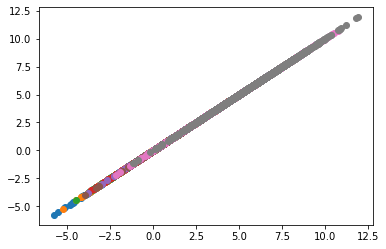

In [61]:
# colors = ["red", "blue", "yellow", "black"]

for ix, e in enumerate(E):
    start_index = num_data_each_env*ix
    end_index = num_data_each_env*(ix+1) - 1
    plt.scatter(Z[start_index:end_index, 1], Z[start_index:end_index, 3])

In [62]:
!ls ./running_related_data

checkpoints  datasets  datasets_synthetic_data	ivae_0_1.p  logs


In [63]:
dataset_path = "./run/synthetic_datasets"
!mkdir $dataset_path

mkdir: cannot create directory ‘./run/synthetic_datasets’: File exists


In [66]:
np.save(f"{dataset_path}/x_nl_5node1.npy", X)
np.save(f"{dataset_path}/y_nl_5node1.npy", Y)
np.save(f"{dataset_path}/s_nl_5node1.npy", Z)
np.save(f"{dataset_path}/u_nl_5node1.npy", U)

In [65]:
max(Y)

array([919.04687471])

In [150]:
pairs = []
for i in range(3):
    other_features = [j for j in range(3) if j!=i]
    
    for j in other_features:
        pairs.append((i,j))
        
    

In [172]:
pair = pairs[1]

f1 = torch.Tensor(Z[:,pair[0]:pair[0]+1])
f2 = torch.Tensor(Z[:,pair[1]:pair[1]+1])

In [178]:
index_f1 = torch.Tensor([pair[0] for i in range(f1.shape[0])])
index_f1 = index_f1[:,None]
index_f2 = torch.Tensor([pair[1] for i in range(f1.shape[0])])
index_f2 = index_f2[:,None]
zn = torch.cat((f1,f2,index_f1 , index_f2), 1)

In [179]:
zn.shape

torch.Size([4000, 4])

In [177]:
f1.shape

torch.Size([4000, 1])

In [184]:
import pandas as pd
df1 = pd.DataFrame({"name": ["ali"]})
df2 = pd.DataFrame({"name": ["mehdi"]})
df1, df2

(  name
 0  ali,
     name
 0  mehdi)

In [188]:
df1 =pd.concat([df1, df2])
df1

,name
0,ali
0,mehdi
0,mehdi
0,mehdi


In [219]:
from models import cleanIVAE, cleanVAE, Discriminator, MLP, CIVAE, permute_dims
def get_model(data_dim, env_dim, latent_dim, config):

    # Data Encoder
    data_encoder = MLP(
        input_dim = data_dim,
        output_dim = config.data_enc_output_dim,
        hidden_dim = config.data_enc_hidden_dim,
        n_layers = config.data_enc_n_layers,
        activation = config.data_enc_activation,
        slope = config.data_enc_slope
    ).to(torch.float64).to(config.device)
    
    # Environment Encoder
    env_encoder = MLP(
        input_dim = env_dim,
        output_dim = config.env_enc_output_dim,
        hidden_dim = config.env_enc_hidden_dim,
        n_layers = config.env_enc_n_layers,
        activation = config.env_enc_activation,
        slope = config.env_enc_slope
    ).to(torch.float64).to(config.device)

    # Linear Prior 
    linear_prior = MLP(
        input_dim = config.data_enc_output_dim,
        output_dim = config.data_enc_output_dim,
        hidden_dim = config.linear_prior_hidden_dim,
        n_layers = config.linear_prior_n_layers,
        activation = config.linear_prior_activation,
        slope = config.linear_prior_slope
    ).to(torch.float64).to(config.device)

    # Linear Prior's Environment Encoder 
    env_encoder_linear_prior = MLP(
        input_dim = env_dim,
        output_dim = config.data_enc_output_dim,
        hidden_dim = config.env_encoder_linear_prior_hidden_dim,
        n_layers = config.env_encoder_linear_prior_n_layers,
        activation = config.env_encoder_linear_prior_activation,
        slope = config.env_encoder_linear_prior_slope
    ).to(torch.float64).to(config.device)

    # Non-Linear Prior 
    non_linear_prior = MLP(
        input_dim = config.data_enc_output_dim,
        output_dim = config.data_enc_output_dim,
        hidden_dim = config.non_linear_prior_hidden_dim,
        n_layers = config.non_linear_prior_n_layers,
        activation = config.non_linear_prior_activation,
        slope = config.non_linear_prior_slope
    ).to(torch.float64).to(config.device)

    # Non-Linear Prior Environment Encoder 
    env_encoder_non_linear_prior = MLP(
        input_dim = env_dim,
        output_dim = config.data_enc_output_dim,
        hidden_dim = config.env_encoder_non_linear_prior_hidden_dim,
        n_layers = config.env_encoder_non_linear_prior_n_layers,
        activation = config.env_encoder_non_linear_prior_activation,
        slope = config.env_encoder_non_linear_prior_slope
    ).to(torch.float64).to(config.device)

    # Graph Weights
    graph_weights = MLP(
        input_dim = env_dim,
        output_dim = latent_dim * (latent_dim - 1),
        hidden_dim = config.graph_weights_hidden_dim,
        n_layers = config.graph_weights_n_layers,
        activation = config.graph_weights_activation,
        slope = config.graph_weights_slope
    ).to(torch.float64).to(config.device)

    # Mutual Effects
    mutual_effects = MLP(
        input_dim = latent_dim,
        # output_dim = latent_dim * (latent_dim - 1),
        output_dim = 1,
        hidden_dim = config.mutual_effects_hidden_dim,
        n_layers = config.mutual_effects_n_layers,
        activation = config.mutual_effects_activation,
        slope = config.mutual_effects_slope
    ).to(torch.float64).to(config.device)

    # CIVAE model
    civae = CIVAE(
        data_encoder=data_encoder,
        env_encoder=env_encoder,
        latent_dim = latent_dim,
        linear_prior_net = linear_prior,
        env_encoder_linear_prior = env_encoder_linear_prior,
        non_linear_prior_net = non_linear_prior,
        env_encoder_non_linear_prior = env_encoder_non_linear_prior,
        graph_weights_net = graph_weights,
        mutual_effects_net = mutual_effects,
        hidden_dim = config.civae_hidden_dim,
        n_layers = config.civae_n_layers,
        activation = config.civae_activation,
        slope = config.civae_slope
    ).to(torch.float64).to(config.device)

    return civae

In [229]:
import argparse
import yaml
import os 
def dict2namespace(config):
    namespace = argparse.Namespace()
    for key, value in config.items():
        if isinstance(value, dict):
            new_value = dict2namespace(value)
        else:
            new_value = value
        setattr(namespace, key, new_value)
    return namespace
with open(os.path.join('./configs', "civae.yaml"), 'r') as f:
    # print(args.config)
    # print(r)
    # import pdb;pdb.set_trace()  
    config = yaml.load(f, Loader=yaml.FullLoader)

config = dict2namespace(config)
config.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# print(new_config)

np.random.seed(0)
torch.manual_seed(0)

In [230]:
model = get_model(10, 2, 4, config)

In [261]:
!ls "./run/datasets/u_nl.npy"

./run/datasets/u_nl.npy


In [262]:
U = np.load(f"./run/datasets/u_nl.npy")
U_torch = torch.tensor(U).to("cuda:0")
U_torch = U_torch[:10, :]
weights = model.weight_matrix_2D(U_torch)

In [269]:
weigths_processed = torch.zeros_like(weights)
processed = [np.(weights)]

for i in range(weigths_processed.shape[0]):
    for j in range(weigths_processed.shape[1]):
        if i==j or weigths_processed[j, i]!=0:
            continue
        if weights[i, j] > weights[j, i]:
            weigths_processed[j, i] = 0
        else:
            weigths_processed[i, j] = 0

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [263]:
index = 0

print(U_torch[index, :])

tensor([0.2000, 3.3563], device='cuda:0', dtype=torch.float64)


In [264]:
weights[index, :]

tensor([[  0.0000, -94.4720,  33.0693, -79.5308],
        [ 20.0107,   0.0000, -28.7187,  82.9653],
        [  4.1322,  68.1637,   0.0000,  96.3725],
        [-22.1382, -94.3256,  26.8252,   0.0000]], device='cuda:0',
       dtype=torch.float64, grad_fn=<SliceBackward0>)

In [233]:
U.shape, type(U)

((6000, 2), numpy.ndarray)